In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

n = 200

df = pd.DataFrame({
    "customer_id": np.arange(1001, 1001+n),
    "signup_date": pd.to_datetime("2024-01-01") + pd.to_timedelta(
        np.random.randint(0, 365, size=n), unit="D"
    ),
    "age": np.random.randint(18, 70, size=n),
    "city": np.random.choice(
        ["Bogotá", "Medellín", "Cali", "Barranquilla", "Cartagena"],
        size=n,
        p=[0.35, 0.25, 0.15, 0.15, 0.10]
    ),
    "plan": np.random.choice(
        ["Basic", "Standard", "Premium"],
        size=n,
        p=[0.5, 0.35, 0.15]
    ),
    "monthly_fee": np.random.choice([29, 49, 79], size=n, p=[0.5, 0.35, 0.15]),
    "usage_gb": np.round(np.random.gamma(shape=2.5, scale=5, size=n), 1),
    "support_tickets": np.random.poisson(lam=1.2, size=n),
})

# churn con algo de lógica
prob_churn = (
    0.15
    + 0.15*(df["plan"]=="Basic")
    + 0.10*(df["support_tickets"]>2)
    + 0.10*(df["usage_gb"]<5)
)
df["churn"] = (np.random.rand(n) < prob_churn).astype(int)

df.head()


,customer_id,signup_date,age,city,plan,monthly_fee,usage_gb,support_tickets,churn
0,1001,2024-04-12,19,Bogotá,Premium,29,9.8,0,0
1,1002,2024-12-14,20,Barranquilla,Basic,29,15.2,2,0
2,1003,2024-09-27,66,Barranquilla,Premium,79,8.4,3,0
3,1004,2024-04-16,54,Barranquilla,Basic,29,10.3,1,1
4,1005,2024-03-12,66,Cartagena,Premium,49,10.2,2,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   customer_id      200 non-null    int64         
 1   signup_date      200 non-null    datetime64[ns]
 2   age              200 non-null    int64         
 3   city             200 non-null    object        
 4   plan             200 non-null    object        
 5   monthly_fee      200 non-null    int64         
 6   usage_gb         200 non-null    float64       
 7   support_tickets  200 non-null    int64         
 8   churn            200 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(2)
memory usage: 14.2+ KB


In [ ]:
df.describe()

,customer_id,signup_date,age,monthly_fee,usage_gb,support_tickets,churn
count,200.000000,200,200.000000,200.00000,200.00000,200.000000,200.000000
mean,1100.500000,2024-07-06 23:09:36,44.235000,43.75000,12.24550,1.255000,0.255000
min,1001.000000,2024-01-02 00:00:00,18.000000,29.00000,1.70000,0.000000,0.000000
25%,1050.750000,2024-04-08 18:00:00,34.000000,29.00000,6.50000,0.750000,0.000000
50%,1100.500000,2024-07-09 12:00:00,46.000000,49.00000,10.65000,1.000000,0.000000
75%,1150.250000,2024-09-27 18:00:00,55.250000,49.00000,15.95000,2.000000,1.000000
max,1200.000000,2024-12-29 00:00:00,69.000000,79.00000,50.60000,4.000000,1.000000
std,57.879185,NaN,14.966622,17.64922,7.98275,1.032134,0.436955


In [ ]:
df.groupby("plan")["churn"].mean().sort_values(ascending=False)

,churn
plan,
Basic,0.362745
Standard,0.156250
Premium,0.117647


In [ ]:
df.groupby("city")["churn"].mean().sort_values(ascending=False)

,churn
city,
Cartagena,0.315789
Bogotá,0.313433
Barranquilla,0.285714
Cali,0.250000
Medellín,0.137255


In [ ]:
df.groupby("city")["churn"].sum()

,churn
city,
Barranquilla,10
Bogotá,21
Cali,7
Cartagena,6
Medellín,7


In [ ]:
df["day"] = df["signup_date"].dt.day_of_week
df["month"] = df["signup_date"].dt.month_name()
df["year"] = df["signup_date"].dt.year

df.head()

,customer_id,signup_date,age,city,plan,monthly_fee,usage_gb,support_tickets,churn,day,month,year
0,1001,2024-04-12,19,Bogotá,Premium,29,9.8,0,0,4,April,2024
1,1002,2024-12-14,20,Barranquilla,Basic,29,15.2,2,0,5,December,2024
2,1003,2024-09-27,66,Barranquilla,Premium,79,8.4,3,0,4,September,2024
3,1004,2024-04-16,54,Barranquilla,Basic,29,10.3,1,1,1,April,2024
4,1005,2024-03-12,66,Cartagena,Premium,49,10.2,2,0,1,March,2024


In [ ]:
df["month"].value_counts()

,count
month,
August,25
February,21
December,19
September,18
June,16
November,16
May,16
July,16
October,14


In [ ]:
df.pivot_table(index= "plan", values= "churn")

,churn
plan,
Basic,0.362745
Premium,0.117647
Standard,0.156250


In [ ]:
df.groupby(df["age"]> 44)["churn"].mean()

,churn
age,
False,0.263158
True,0.247619


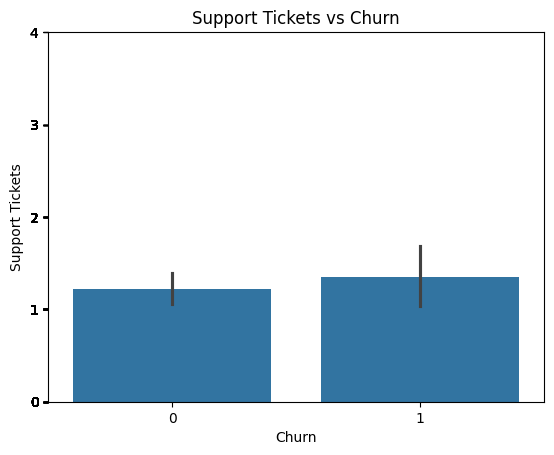

In [ ]:
sns.barplot(x= "churn", y= "support_tickets", data= df)
plt.ylabel("Support Tickets")
plt.yticks(df['support_tickets'])
plt.xlabel("Churn")
plt.title("Support Tickets vs Churn")
plt.show()

In [ ]:
df.groupby("support_tickets")["churn"].sum()

,churn
support_tickets,
0,14
1,16
2,12
3,7
4,2


In [ ]:
df.groupby(["plan","city"])["churn"].mean().sort_values(ascending=False)


plan      city        
Basic     Bogotá          0.451613
          Cartagena       0.444444
          Cali            0.416667
          Barranquilla    0.363636
Standard  Cartagena       0.285714
          Barranquilla    0.250000
Basic     Medellín        0.214286
Premium   Bogotá          0.200000
Standard  Bogotá          0.190476
Premium   Cali            0.166667
Standard  Cali            0.100000
          Medellín        0.055556
Premium   Barranquilla    0.000000
          Medellín        0.000000
          Cartagena       0.000000
Name: churn, dtype: float64